# BANK MARKETING ANALYSIS


Main Code Blocks:
  1) Data Loading
  2) Pre-processing
  3) Data Optimization & Visualizations
  4) Model Training
  5) Model Quality Assessment + Model Visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid", context="notebook")

### Data Loading

In [3]:
# Load the UCI Bank Marketing dataset
data = pd.read_csv("/content/bank-additional-full.csv", sep=';')
print("Original shape:", data.shape)
print(data.head())

Original shape: (41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Data Pre-Processing and Optimization

In [5]:
# Data cleaning
# Replace 'unknown' with NaN and drop missing rows
data.replace('unknown', np.nan, inplace=True)
data.dropna(inplace=True)

# Remove extreme call durations
data = data[data['duration'] <= 2000]

# Keep only reasonable ages
data = data[(data['age'] >= 18) & (data['age'] <= 100)]


In [6]:
# Categorical encoding
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'month', 'day_of_week', 'poutcome'
]

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col + '_enc'] = le.fit_transform(data[col])
    le_dict[col] = le

# Target encoding: y (yes/no) -> y_enc (1/0)
data['y_enc'] = (data['y'] == 'yes').astype(int)

In [7]:
# For our understanding of the data
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'month', 'day_of_week', 'poutcome'
]

for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(data[col].unique())
    print("-")

encoded_cols = [col + "_enc" for col in categorical_cols]

for col in encoded_cols:
    print(f"Unique encoded values in {col}:")
    print(data[col].unique())
    print("-")


Unique values in job:
['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
-
Unique values in marital:
['married' 'single' 'divorced']
-
Unique values in education:
['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']
-
Unique values in default:
['no' 'yes']
-
Unique values in housing:
['no' 'yes']
-
Unique values in loan:
['no' 'yes']
-
Unique values in contact:
['telephone' 'cellular']
-
Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
-
Unique values in day_of_week:
['mon' 'tue' 'wed' 'thu' 'fri']
-
Unique values in poutcome:
['nonexistent' 'failure' 'success']
-
Unique encoded values in job_enc:
[ 3  7  0  9  1 10  5  2  4  8  6]
-
Unique encoded values in marital_enc:
[1 2 0]
-
Unique encoded values in education_enc:
[0 3 1 5 2 6 4]
-
Unique encoded values in default_enc:
[0 1]
-
Unique encoded values in hous

In [8]:
# Feature selection
features = [
    'age', 'job_enc', 'marital_enc', 'education_enc', 'default_enc',
    'housing_enc', 'loan_enc', 'contact_enc', 'month_enc', 'day_of_week_enc',
    'duration', 'campaign', 'pdays', 'previous', 'poutcome_enc',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

X = data[features]
y_clf = data['y_enc']          # classification target
# y_reg = data['duration']       # regression target

In [9]:
# Train/Test split (same split for classification & regression targets)
X_train, X_test, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=123, stratify=y_clf
)

# Scaling for ML models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Handle class imbalance with SMOTE for classification
smote = SMOTE(random_state=123)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train_clf)

print("Cleaned shape:", data.shape)
print("Class balance after SMOTE:", np.bincount(y_train_bal))

Cleaned shape: (30439, 32)
Class balance after SMOTE: [21287 21287]


In [11]:
# Shared figure settings and grouped data
import matplotlib.pyplot as plt
import seaborn as sns

# For Plot 1
job_sub = data.groupby('job')['y_enc'].mean().sort_values(ascending=False).head(5)

# For Plot 2
month_sub = data.groupby('month')['y_enc'].mean()
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug',
               'sep', 'oct', 'nov', 'dec', 'feb', 'jan']
month_sub = month_sub.reindex(month_order)

# For Plot 3
corr_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
             'euribor3m', 'nr.employed', 'y_enc']
corr_matrix = data[corr_cols].corr()

# For Plot 4
contact_dur = data.groupby('contact')['duration'].mean().sort_values(ascending=False)

# For Plot 5
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Group and plot counts
age_counts = data['age_group'].value_counts().sort_index()


### Data Visualizations

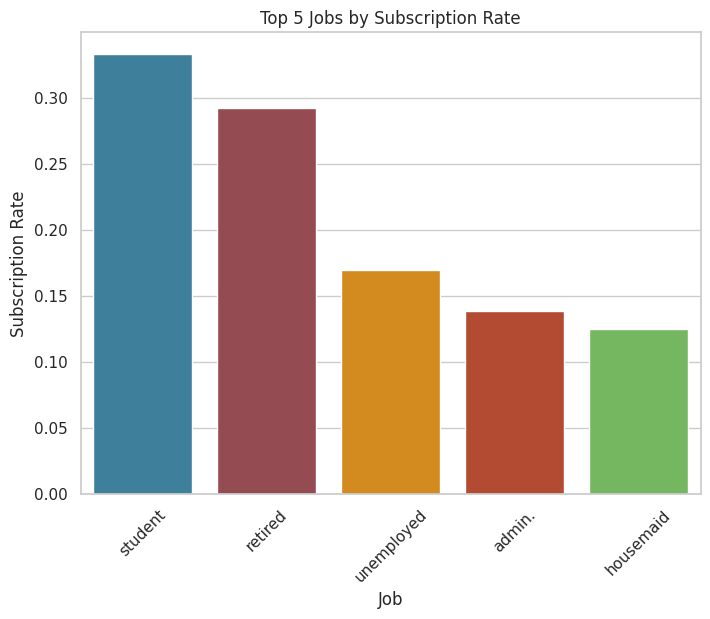

In [12]:
colors = ["#2E86AB", "#A23E48", "#F18F01", "#C73E1D", "#6CC551"]

plt.figure(figsize=(8, 6))
sns.barplot(x=job_sub.index, y=job_sub.values, palette=colors)
plt.title('Top 5 Jobs by Subscription Rate')
plt.ylabel('Subscription Rate')
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.show()

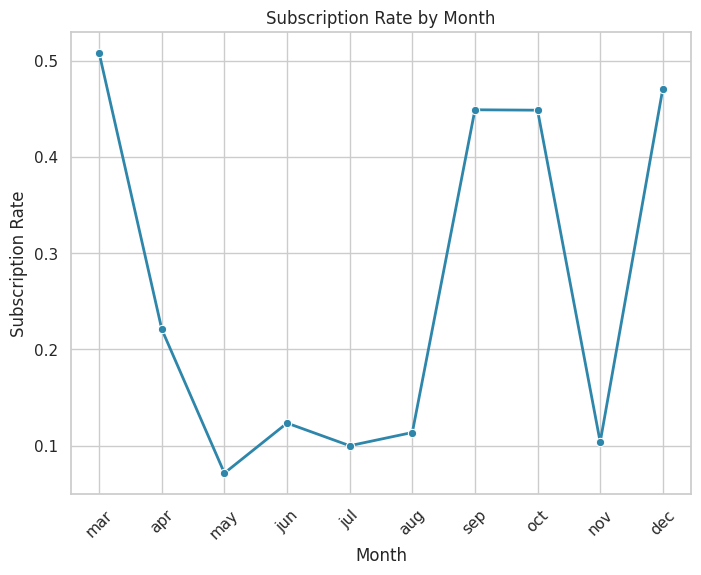

In [13]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=month_sub.index,
             y=month_sub.values,
             marker='o',
             color="#2E86AB",
             linewidth=2)

plt.title('Subscription Rate by Month')
plt.ylabel('Subscription Rate')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

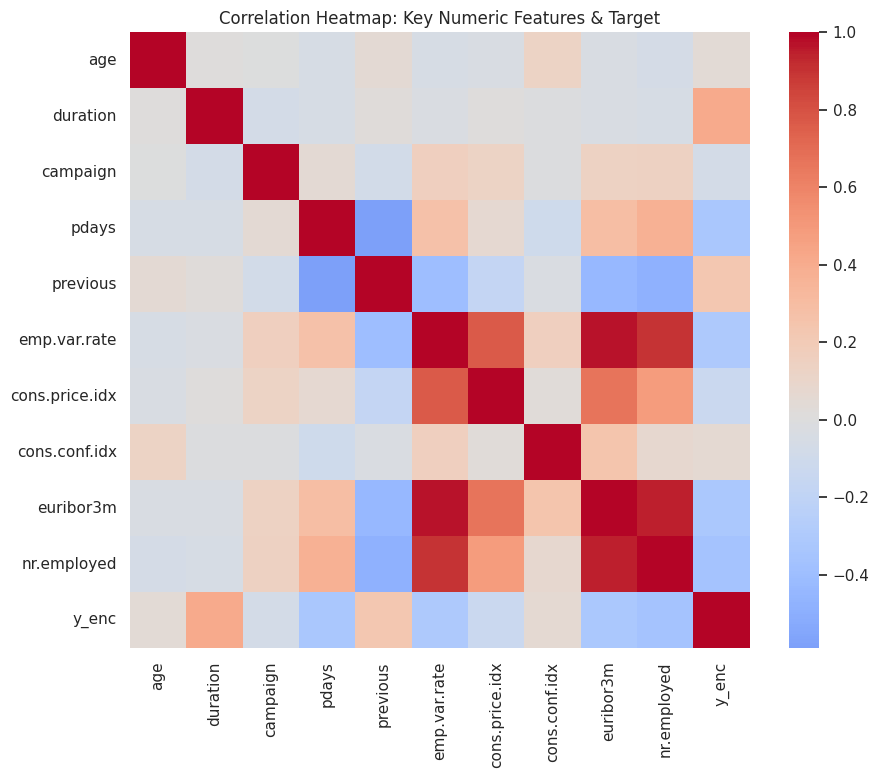

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Key Numeric Features & Target')
plt.show()

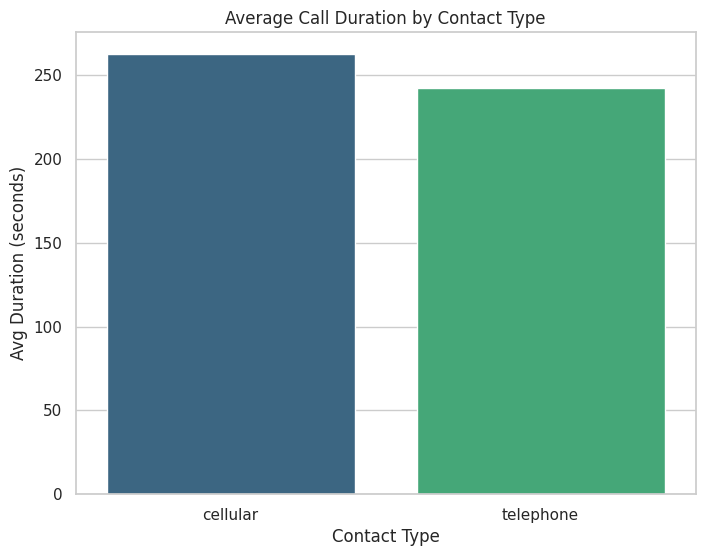

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=contact_dur.index,
            y=contact_dur.values,
            palette="viridis")
plt.title('Average Call Duration by Contact Type')
plt.ylabel('Avg Duration (seconds)')
plt.xlabel('Contact Type')
plt.xticks(rotation=0)
plt.show()


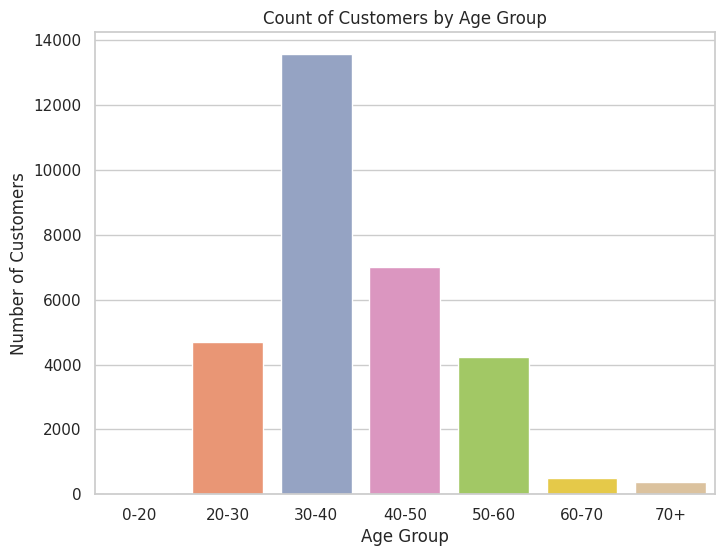

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x=age_counts.index,
            y=age_counts.values,
            palette="Set2")

plt.title('Count of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


In [17]:
# Create duration bins
bins = [0, 50, 100, 150, 200, 300, 400, 600, 800, 1200, 2000]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

data['duration_group'] = pd.cut(data['duration'], bins=bins, labels=labels, right=False)

# Subscription rate per duration range
duration_rate = data.groupby('duration_group')['y_enc'].mean()

print(duration_rate.sort_values(ascending=False))

duration_group
1200-2000    0.615385
800-1200     0.563518
600-800      0.419380
400-600      0.257878
300-400      0.171114
200-300      0.131322
150-200      0.076708
100-150      0.042689
50-100       0.014374
0-50         0.000451
Name: y_enc, dtype: float64


### ML modelling

We'll train:

 Classification models to predict subscription

 A Neural Network classifier

 KMeans clustering + PCA for client segmentation

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, average_precision_score, classification_report

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=123)
log_reg.fit(X_train_bal, y_train_bal)

# Predictions
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred_lr = (y_prob_lr > 0.5).astype(int)

# Metrics
fpr_lr, tpr_lr, _ = roc_curve(y_test_clf, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)
ap_lr = average_precision_score(y_test_clf, y_prob_lr)
acc_lr = classification_report(y_test_clf, y_pred_lr, output_dict=True)['accuracy']

print("Logistic Regression Results")
print(f"Accuracy: {acc_lr:.3f}")
print(f"AUC: {auc_lr:.3f}")
print(f"Average Precision: {ap_lr:.3f}")

Logistic Regression Results
Accuracy: 0.849
AUC: 0.930
Average Precision: 0.590


Classification Report (Logistic Regression)
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5322
           1       0.45      0.88      0.59       766

    accuracy                           0.85      6088
   macro avg       0.71      0.86      0.75      6088
weighted avg       0.91      0.85      0.87      6088



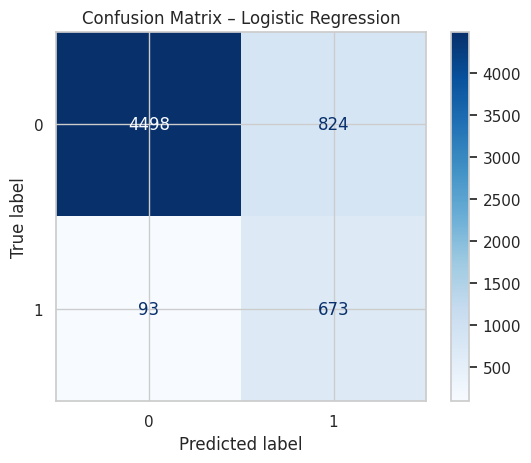

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test_clf, y_pred_lr)
print("Classification Report (Logistic Regression)")
print(classification_report(y_test_clf, y_pred_lr))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train_bal, y_train_bal)

# Predictions
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = (y_prob_rf > 0.5).astype(int)

# Metrics
fpr_rf, tpr_rf, _ = roc_curve(y_test_clf, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
ap_rf = average_precision_score(y_test_clf, y_prob_rf)
acc_rf = classification_report(y_test_clf, y_pred_rf, output_dict=True)['accuracy']

print("Random Forest Results")
print(f"Accuracy: {acc_rf:.3f}")
print(f"AUC: {auc_rf:.3f}")
print(f"Average Precision: {ap_rf:.3f}")

Random Forest Results
Accuracy: 0.898
AUC: 0.940
Average Precision: 0.647


Classification Report (Random Forest)
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5322
           1       0.58      0.67      0.62       766

    accuracy                           0.90      6088
   macro avg       0.77      0.80      0.78      6088
weighted avg       0.91      0.90      0.90      6088



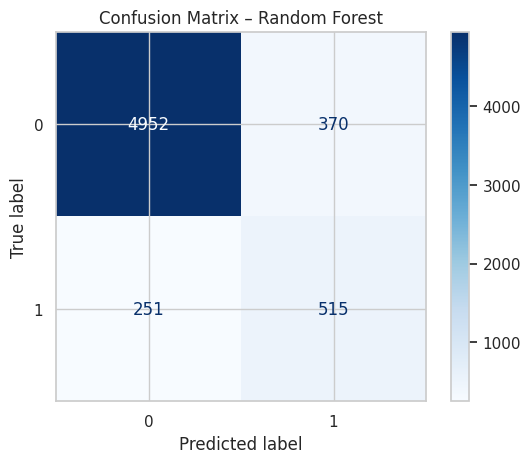

In [21]:
cm_rf = confusion_matrix(y_test_clf, y_pred_rf)
print("Classification Report (Random Forest)")
print(classification_report(y_test_clf, y_pred_rf))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.show()


KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)

# Predictions
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
y_pred_knn = (y_prob_knn > 0.5).astype(int)

# Metrics
fpr_knn, tpr_knn, _ = roc_curve(y_test_clf, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)
ap_knn = average_precision_score(y_test_clf, y_prob_knn)
acc_knn = classification_report(y_test_clf, y_pred_knn, output_dict=True)['accuracy']

print("KNN Results")
print(f"Accuracy: {acc_knn:.3f}")
print(f"AUC: {auc_knn:.3f}")
print(f"Average Precision: {ap_knn:.3f}")

KNN Results
Accuracy: 0.840
AUC: 0.866
Average Precision: 0.436


Classification Report (KNN) 
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5322
           1       0.42      0.77      0.55       766

    accuracy                           0.84      6088
   macro avg       0.69      0.81      0.73      6088
weighted avg       0.90      0.84      0.86      6088



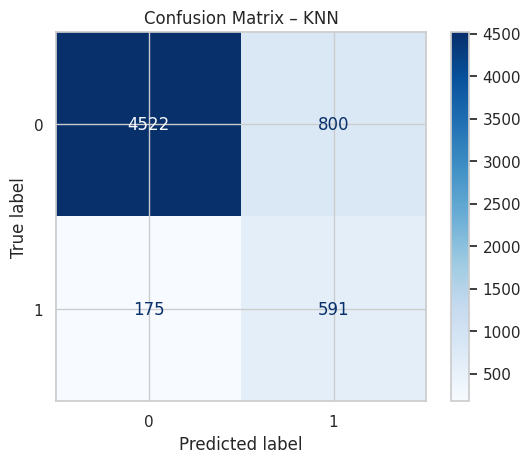

In [23]:
cm_knn = confusion_matrix(y_test_clf, y_pred_knn)
print("Classification Report (KNN) ")
print(classification_report(y_test_clf, y_pred_knn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – KNN")
plt.show()


SVC

In [24]:
from sklearn.svm import SVC

# Train SVM (subsample for speed)
svm = SVC(probability=True, random_state=123)
svm.fit(X_train_bal[:10000], y_train_bal[:10000])

# Predictions
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]
y_pred_svm = (y_prob_svm > 0.5).astype(int)

# Metrics
fpr_svm, tpr_svm, _ = roc_curve(y_test_clf, y_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)
ap_svm = average_precision_score(y_test_clf, y_prob_svm)
acc_svm = classification_report(y_test_clf, y_pred_svm, output_dict=True)['accuracy']

print("SVM Results")
print(f"Accuracy: {acc_svm:.3f}")
print(f"AUC: {auc_svm:.3f}")
print(f"Average Precision: {ap_svm:.3f}")


SVM Results
Accuracy: 0.901
AUC: 0.911
Average Precision: 0.637


Classification Report (SVM) 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5322
           1       0.68      0.41      0.51       766

    accuracy                           0.90      6088
   macro avg       0.80      0.69      0.73      6088
weighted avg       0.89      0.90      0.89      6088



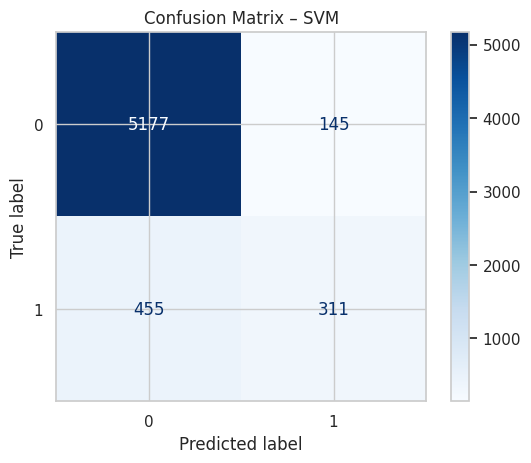

In [25]:
cm_svm = confusion_matrix(y_test_clf, y_pred_svm)
print("Classification Report (SVM) ")
print(classification_report(y_test_clf, y_pred_svm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – SVM")
plt.show()

Deep Learning model - Neural Network

In [26]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=123)
nn.fit(X_train_bal, y_train_bal)

# Predictions
y_prob_nn = nn.predict_proba(X_test_scaled)[:, 1]
y_pred_nn = (y_prob_nn > 0.5).astype(int)

# Metrics
fpr_nn, tpr_nn, _ = roc_curve(y_test_clf, y_prob_nn)
auc_nn = auc(fpr_nn, tpr_nn)
ap_nn = average_precision_score(y_test_clf, y_prob_nn)
acc_nn = classification_report(y_test_clf, y_pred_nn, output_dict=True)['accuracy']

print("Neural Network Results")
print(f"Accuracy: {acc_nn:.3f}")
print(f"AUC: {auc_nn:.3f}")
print(f"Average Precision: {ap_nn:.3f}")

Neural Network Results
Accuracy: 0.883
AUC: 0.911
Average Precision: 0.558


Classification Report (Neural Network) 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5322
           1       0.53      0.60      0.56       766

    accuracy                           0.88      6088
   macro avg       0.74      0.76      0.75      6088
weighted avg       0.89      0.88      0.89      6088



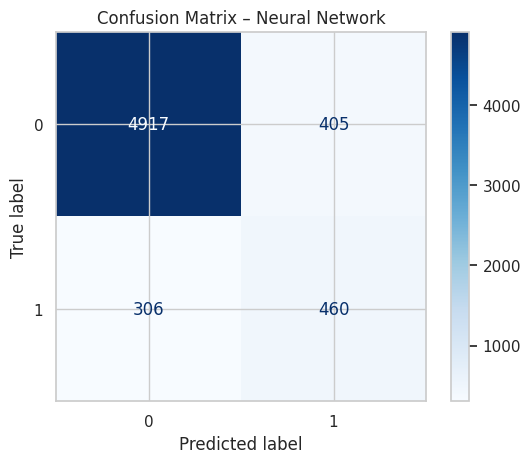

In [27]:
cm_nn = confusion_matrix(y_test_clf, y_pred_nn)
print("Classification Report (Neural Network) ")
print(classification_report(y_test_clf, y_pred_nn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Neural Network")
plt.show()


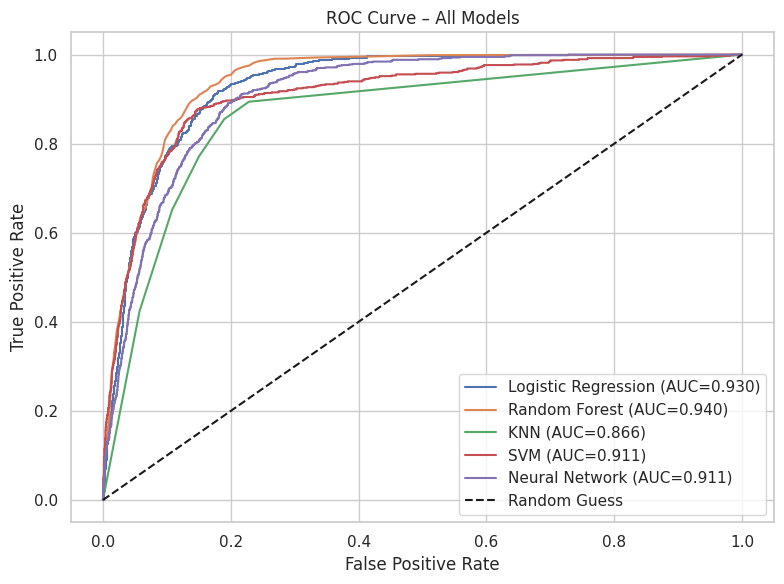

In [28]:
plt.figure(figsize=(8, 6))

# Logistic Regression ROC
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.3f})")

# Random Forest ROC
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")

# KNN ROC
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC={auc_knn:.3f})")

# SVM ROC
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={auc_svm:.3f})")

# Neural Network ROC
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC={auc_nn:.3f})")

# Diagonal (random guessing)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve – All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


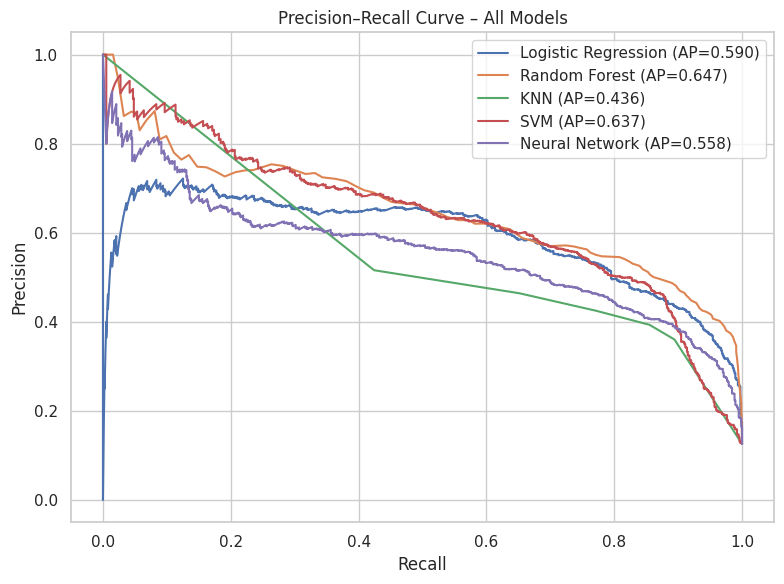

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score
plt.figure(figsize=(8, 6))
# Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test_clf, y_prob_lr)
#ap_lr = average_precision_score(y_test_clf, y_prob_lr)
plt.plot(recall_lr, precision_lr, label=f"Logistic Regression (AP={ap_lr:.3f})")

# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test_clf, y_prob_rf)
#ap_rf = average_precision_score(y_test_clf, y_prob_rf)
plt.plot(recall_rf, precision_rf, label=f"Random Forest (AP={ap_rf:.3f})")

# KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test_clf, y_prob_knn)
#ap_knn = average_precision_score(y_test_clf, y_prob_knn)
plt.plot(recall_knn, precision_knn, label=f"KNN (AP={ap_knn:.3f})")

# SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test_clf, y_prob_svm)
#ap_svm = average_precision_score(y_test_clf, y_prob_svm)
plt.plot(recall_svm, precision_svm, label=f"SVM (AP={ap_svm:.3f})")

# Neural Network
precision_nn, recall_nn, _ = precision_recall_curve(y_test_clf, y_prob_nn)
#ap_nn = average_precision_score(y_test_clf, y_prob_nn)
plt.plot(recall_nn, precision_nn, label=f"Neural Network (AP={ap_nn:.3f})")

plt.title("Precision–Recall Curve – All Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

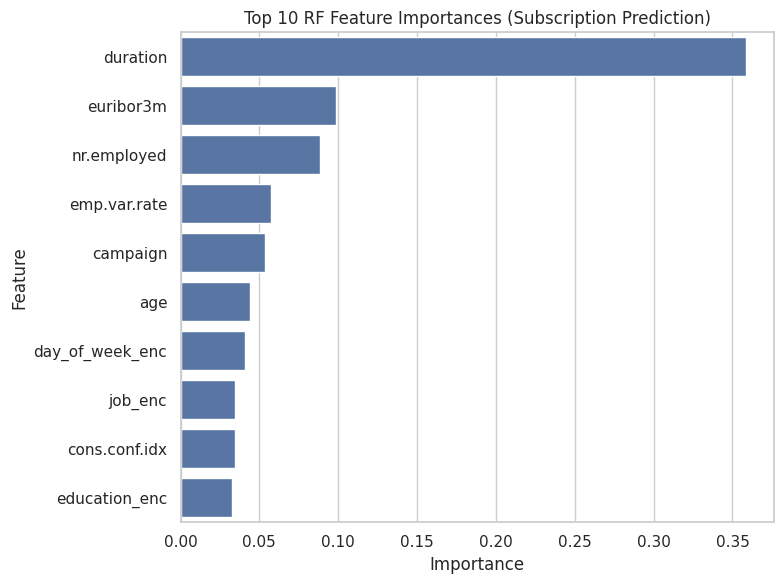

In [30]:
plt.figure(figsize=(8, 6))
importances_clf = rf.feature_importances_
feat_import_clf = pd.Series(importances_clf, index=features).sort_values(ascending=False).head(10)
sns.barplot(x=feat_import_clf.values, y=feat_import_clf.index, orient='h')
plt.title('Top 10 RF Feature Importances (Subscription Prediction)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Curve-fitting

In [31]:
# Curve Fitting Example: Age vs Subscription Rate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [32]:
# Aggregate subscription rate by age
age_group = data.groupby('age')['y_enc'].mean().reset_index()

X_age = age_group[['age']]
y_rate = age_group['y_enc']

# Polynomial curve fitting (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_age)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_rate)

LinearRegression()

In [33]:
# Predict smoothed curve
age_range = np.arange(18, 101).reshape(-1, 1)
age_range_poly = poly.transform(age_range)
y_pred = model_poly.predict(age_range_poly)


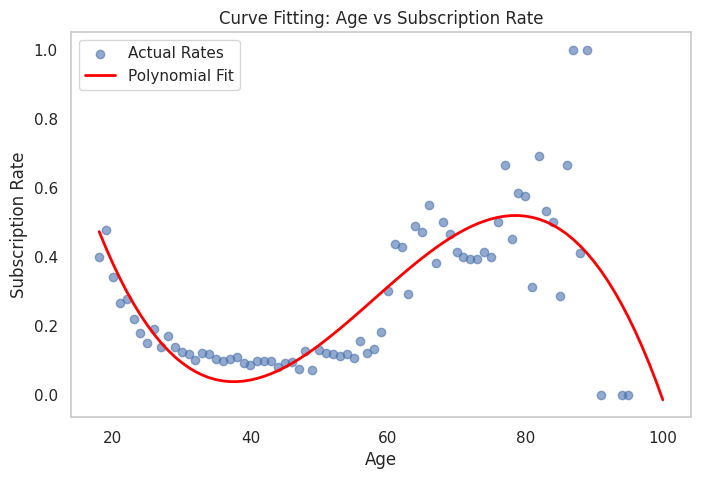

In [34]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_age, y_rate, label='Actual Rates', alpha=0.6)
plt.plot(age_range, y_pred, color='red', linewidth=2, label='Polynomial Fit')
plt.title("Curve Fitting: Age vs Subscription Rate")
plt.xlabel("Age")
plt.ylabel("Subscription Rate")
plt.legend()
plt.grid()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE and R² for the curve fit
rmse_curve = np.sqrt(mean_squared_error(y_rate, model_poly.predict(X_poly)))
r2_curve = r2_score(y_rate, model_poly.predict(X_poly))

print("Curve Fitting Quality:")
print(f"RMSE = {rmse_curve:.4f}")
print(f"R²   = {r2_curve:.4f}")

Curve Fitting Quality:
RMSE = 0.1349
R²   = 0.6151


### CLUSTERING + PCA (Unsupervised)

In [36]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We'll scale the full feature set for clustering/PCA.
scaler_full = StandardScaler()
X_scaled = scaler_full.fit_transform(X)

# subset of features for clustering
cluster_features = X_scaled[:, [0, 11, 12, 13, 14, 15]]  # age, campaign, pdays, previous, poutcome_enc, emp.var.rate

# KMeans clustering (5 segments)
kmeans = KMeans(n_clusters=5, random_state=123)
data['cluster'] = kmeans.fit_predict(cluster_features)

# PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

print("Clustering: 5 client segments identified.")
print(f"PCA: Total explained variance (2 components): {pca.explained_variance_ratio_.sum():.3f}")

Clustering: 5 client segments identified.
PCA: Total explained variance (2 components): 0.291


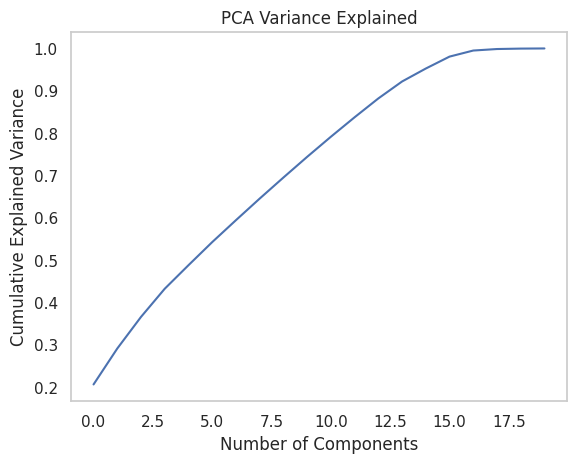

In [37]:
pca20 = PCA(n_components=20)
pca20.fit(X_scaled)
plt.plot(np.cumsum(pca20.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Variance Explained")
plt.grid()
plt.show()

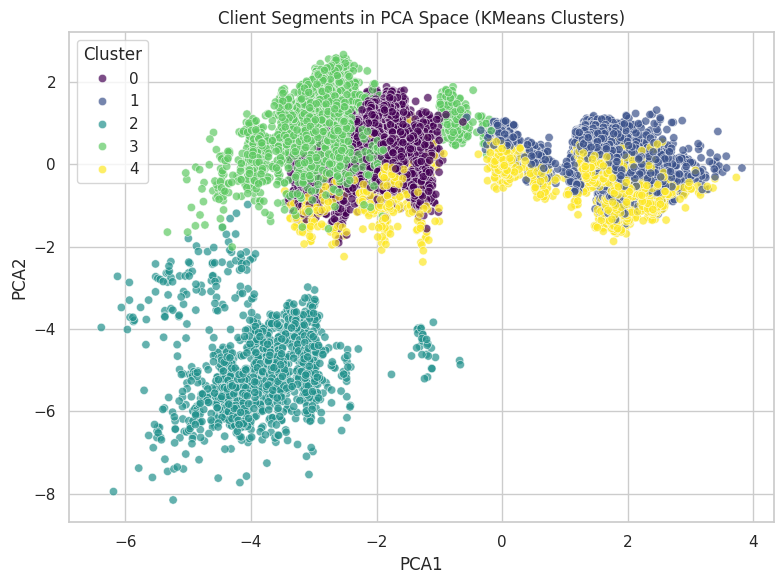

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='pca1', y='pca2', hue='cluster', data=data,
    palette='viridis', alpha=0.7
)
plt.title('Client Segments in PCA Space (KMeans Clusters)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
